In [64]:
import numpy as np
from scipy import linalg as la
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [65]:
def getData():
    mnist = fetch_openml('mnist_784')
    X_train = mnist.data
    y_train = mnist.target
    return X_train, y_train

In [66]:
############################| PROBLEM 2 |######################################

#--------------------------| Question 1 |--------------------------------------

def myPCA(X, k):
    
    # Covariance matrix
    R = np.cov(X, rowvar=False)
    
    #Eigenvalues and Eigenvectors
    evals, evecs = la.eigh(R)
    
    #Sorting Eigenvalues in descending order
    idx = np.argsort(evals)[::-1]
    evecs = evecs[:,idx]
    evals = evals[idx]
    
    #Selecting forst k Eigenvectors
    evecs = evecs[:, :k]
    
    return np.dot(evecs.T, X.T).T, evecs, evals

In [67]:
#--------------------------| Question 2 |--------------------------------------

X_train, y_train = getData()

start = time.time()
retVal,_,_ = myPCA(X_train, 5)
end = time.time()
print("Time elapsed:", end-start)

Time elapsed: 1.6998205184936523


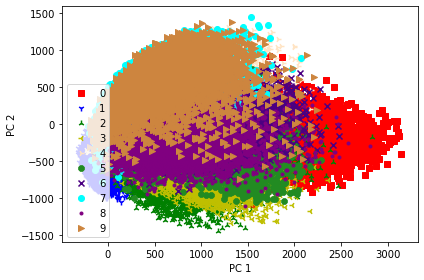

In [68]:
#--------------------------| Question 3 |--------------------------------------
X_train, y_train = getData()

X_pca2,_,_ = myPCA(X_train, 2)

colors = ['r', 'b', 'g', 'y', 'bisque', 'forestgreen', 'indigo', 'cyan', 'purple', 'peru']
markers = ['s', '1', '2', '3', '4', '8','x', 'o', '.',  '>']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_pca2[y_train== l, 0], 
                X_pca2[y_train== l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

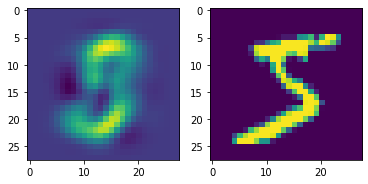

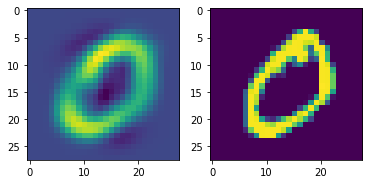

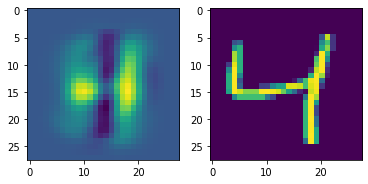

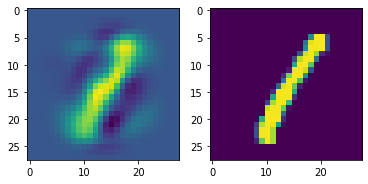

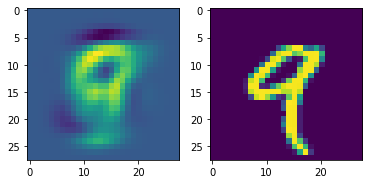

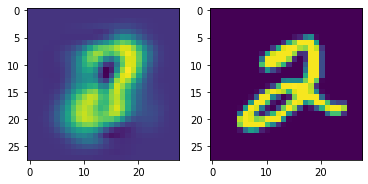

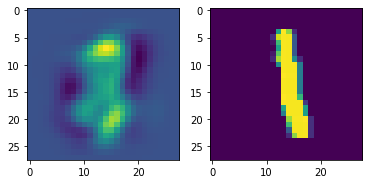

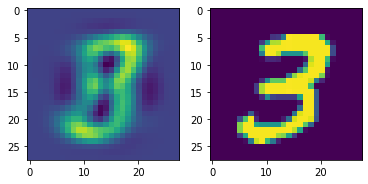

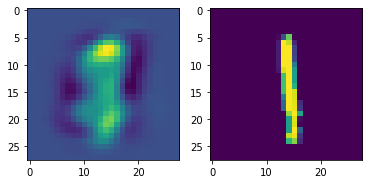

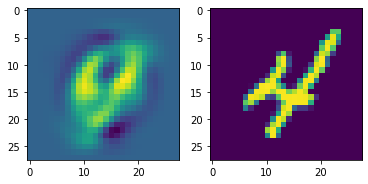

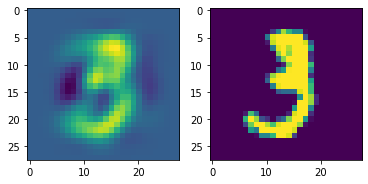

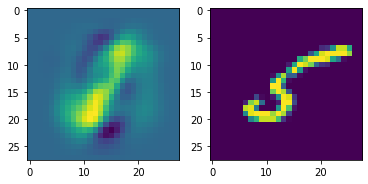

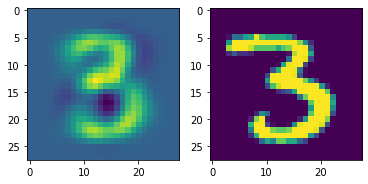

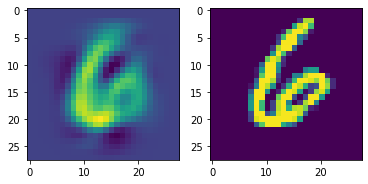

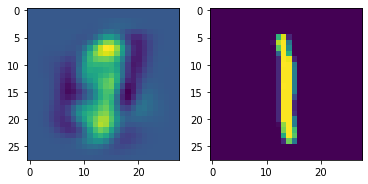

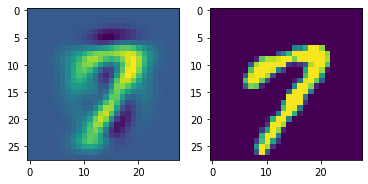

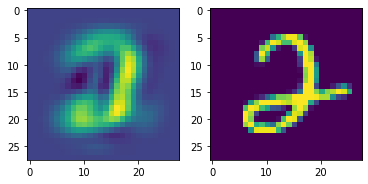

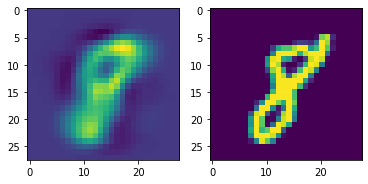

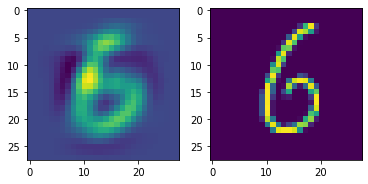

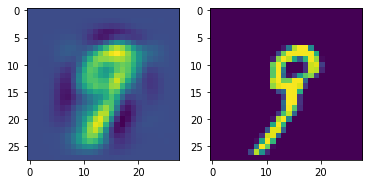

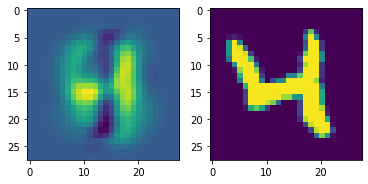

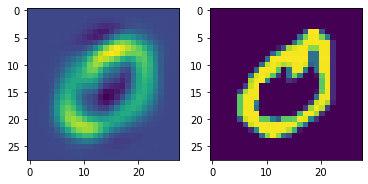

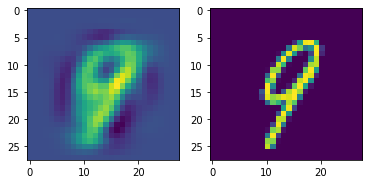

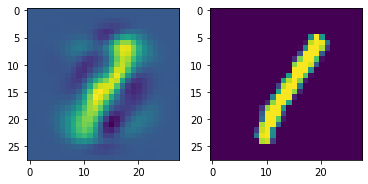

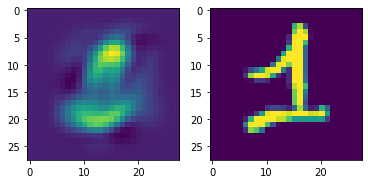

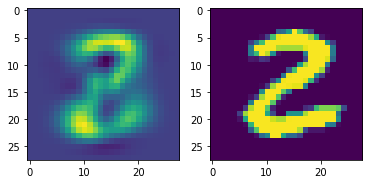

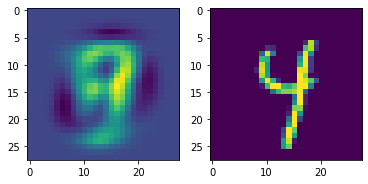

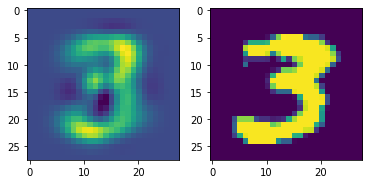

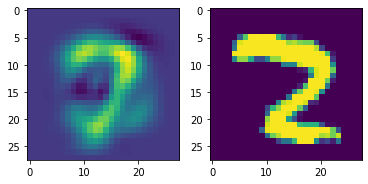

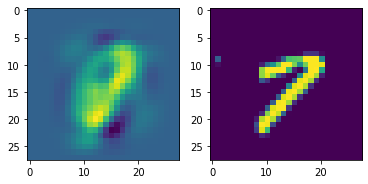

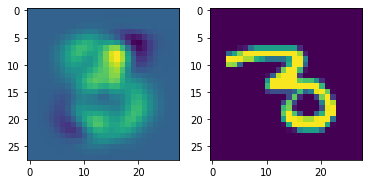

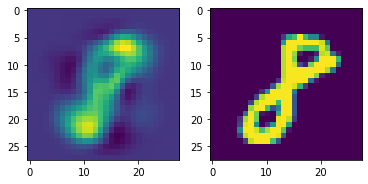

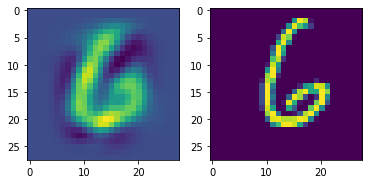

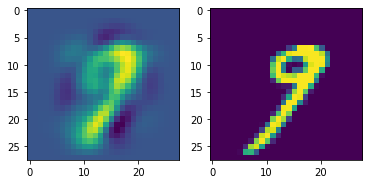

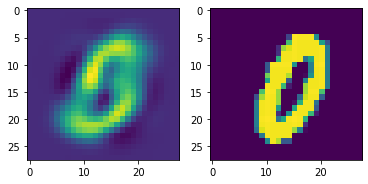

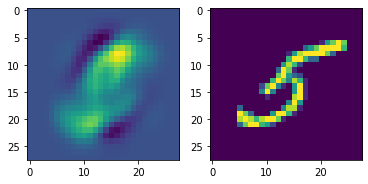

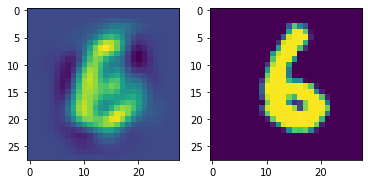

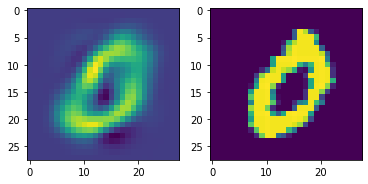

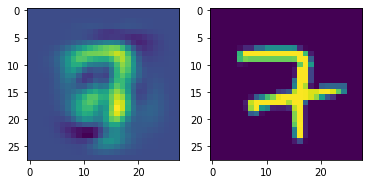

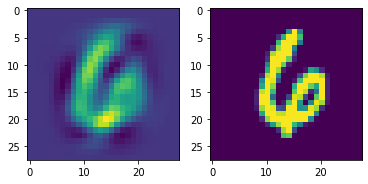

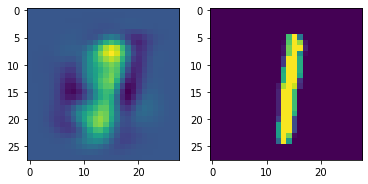

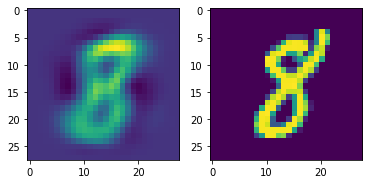

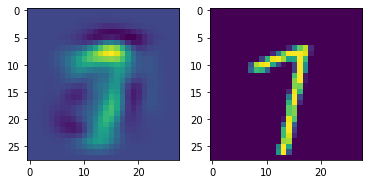

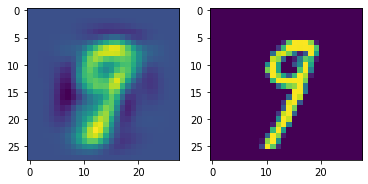

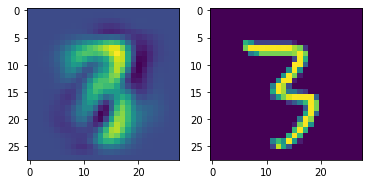

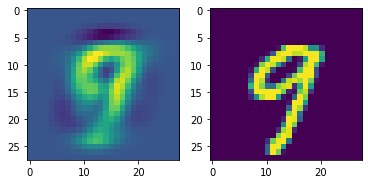

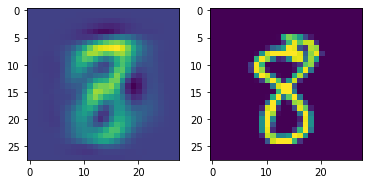

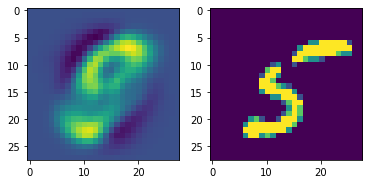

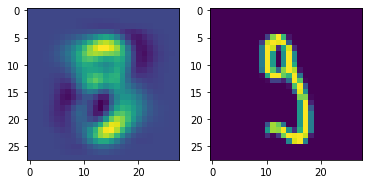

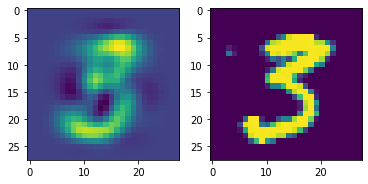

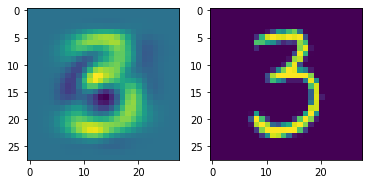

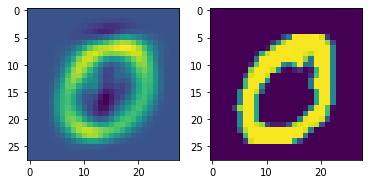

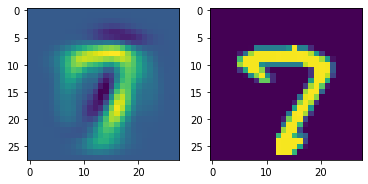

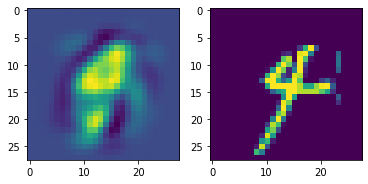

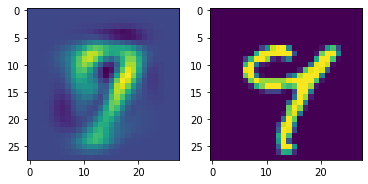

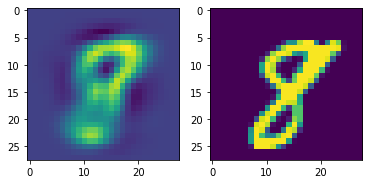

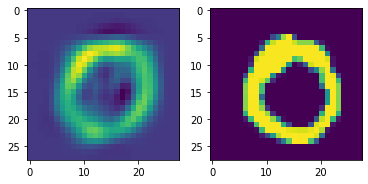

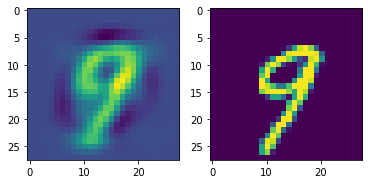

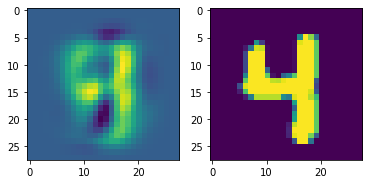

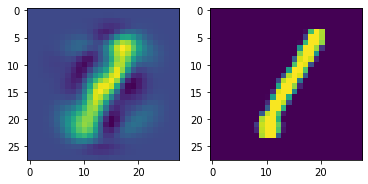

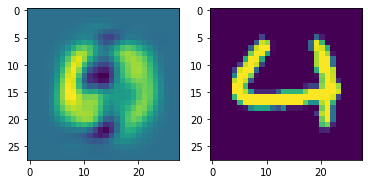

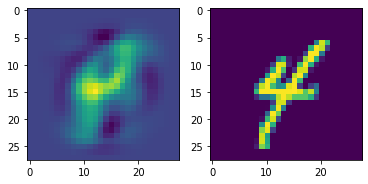

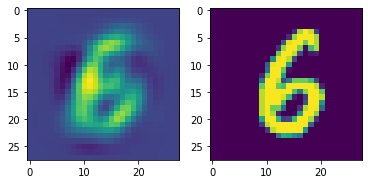

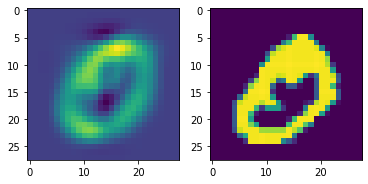

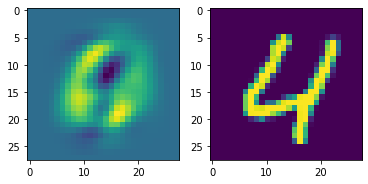

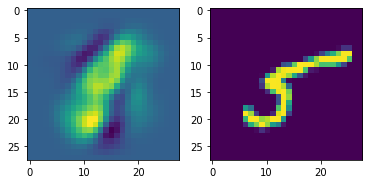

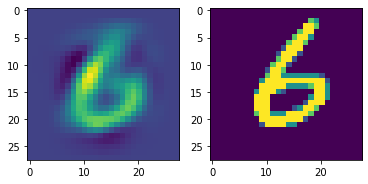

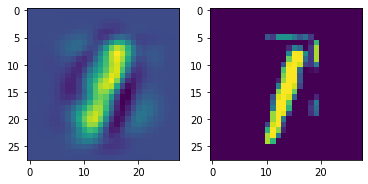

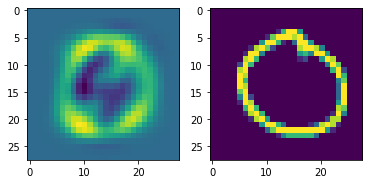

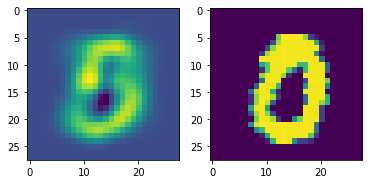

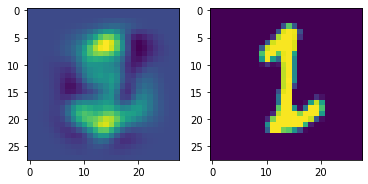

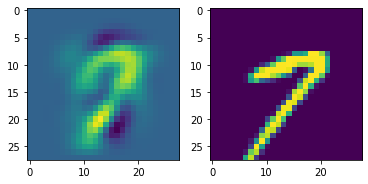

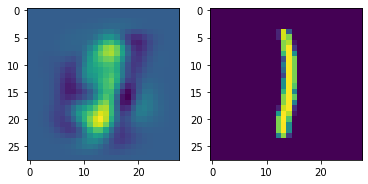

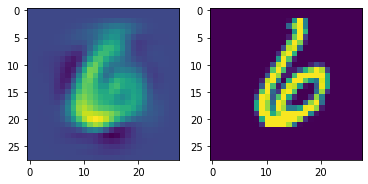

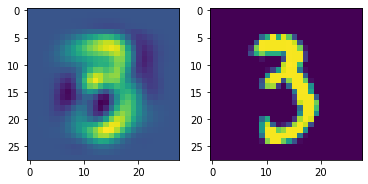

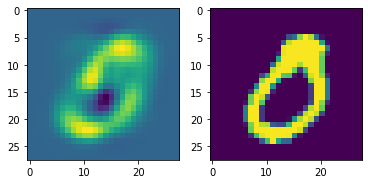

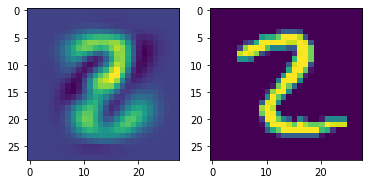

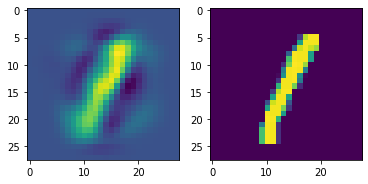

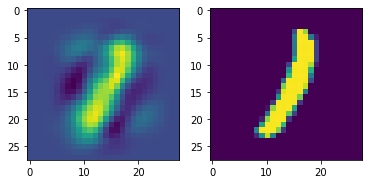

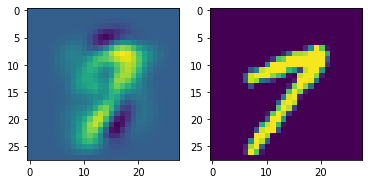

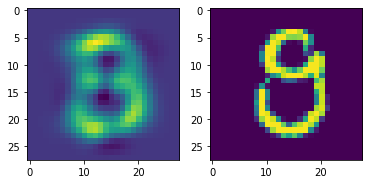

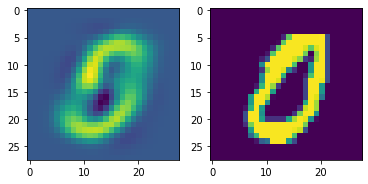

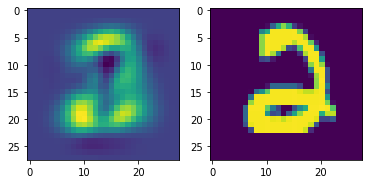

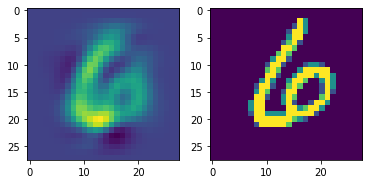

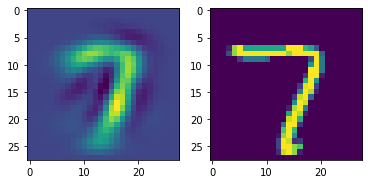

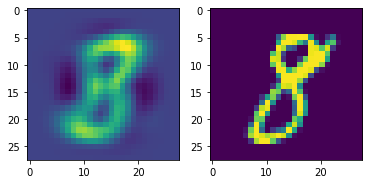

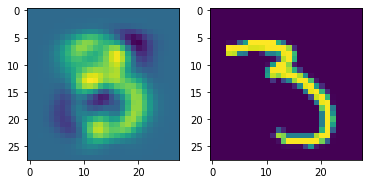

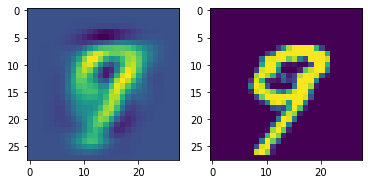

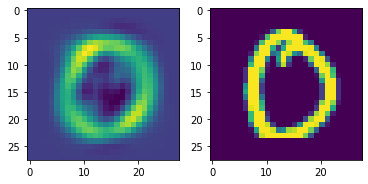

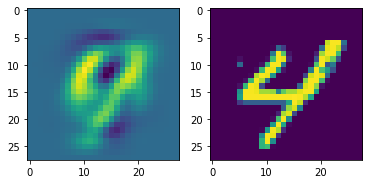

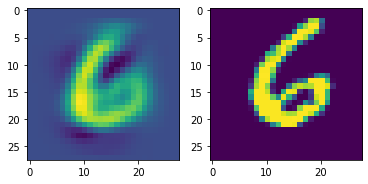

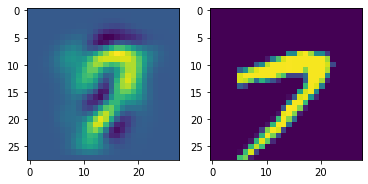

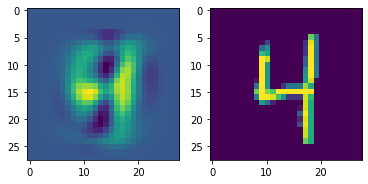

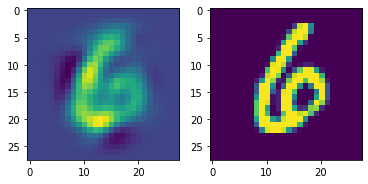

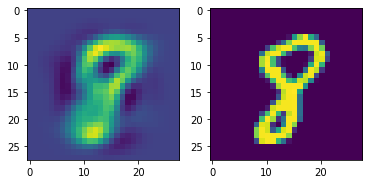

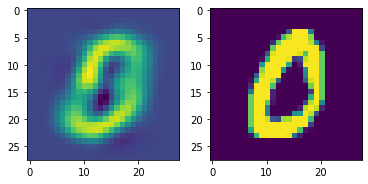

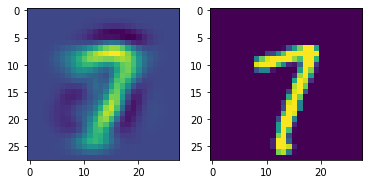

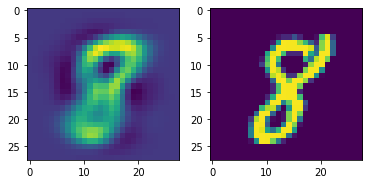

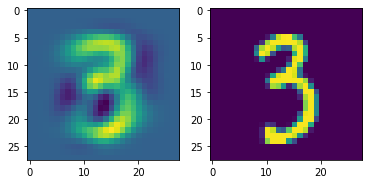

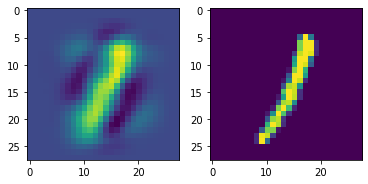

In [70]:
#--------------------------| Question 4 |--------------------------------------
X_train, y_train = getData()

#Reducing the dimensionality to 10
X_pca10,components,_ = myPCA(X_train, 10)

#Reshaping to the original size
X_reshaped = np.dot(X_pca10, components.T)

for i in range(100):
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(X_reshaped[i].reshape((28,28)))
    f.add_subplot(1,2, 2)
    plt.imshow(X_train[i].reshape((28,28)))
    plt.show()

#Looking at the images, we can say that the images closely resemble the original
#ones but we cannot distinguish the digits alone.

In [89]:
import tensorflow as tf
print(tf.__version__)

import keras
print(tf.keras.__version__)

!conda list

2.3.1
2.4.0
# packages in environment at C:\Users\Monica\anaconda3:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0                    py38_0  
absl-py                   0.11.0                   pypi_0    pypi
alabaster                 0.7.12                     py_0  
anaconda                  2020.07                  py38_0  
anaconda-client           1.7.2                    py38_0  
anaconda-navigator        1.9.12                   py38_0  
anaconda-project          0.8.4                      py_0  
argh                      0.26.2                   py38_0  
asn1crypto                1.3.0                    py38_0  
astroid                   2.4.2                    py38_0  
astropy                   4.0.1.post1      py38he774522_1  
astunparse                1.6.3                    pypi_0    pypi
atomicwrites              1.4.0                      py_0  
attrs                     19.3.0                     py_0  
autopep8   

llvmlite                  0.33.0           py38ha925a31_0  
locket                    0.2.0                    py38_1  
lxml                      4.5.2            py38h1350720_0  
lz4-c                     1.9.2                h62dcd97_0  
lzo                       2.10                 he774522_2  
m2w64-gcc-libgfortran     5.3.0                         6  
m2w64-gcc-libs            5.3.0                         7  
m2w64-gcc-libs-core       5.3.0                         7  
m2w64-gmp                 6.1.0                         2  
m2w64-libwinpthread-git   5.0.0.4634.697f757               2  
markdown                  3.3.3                    pypi_0    pypi
markupsafe                1.1.1            py38he774522_0  
matplotlib                3.2.2                         0  
matplotlib-base           3.2.2            py38h64f37c6_0  
mccabe                    0.6.1                    py38_1  
menuinst                  1.4.16           py38he774522_1  
mistune                   0.8.4

urllib3                   1.25.9                     py_0  
vc                        14.1                 h0510ff6_4  
vs2015_runtime            14.16.27012          hf0eaf9b_3  
watchdog                  0.10.3                   py38_0  
wcwidth                   0.2.5                      py_0  
webencodings              0.5.1                    py38_1  
werkzeug                  1.0.1                      py_0  
wheel                     0.34.2                   py38_0  
widgetsnbextension        3.5.1                    py38_0  
win_inet_pton             1.1.0                    py38_0  
win_unicode_console       0.5                      py38_0  
wincertstore              0.2                      py38_0  
winpty                    0.4.3                         4  
wrapt                     1.11.2           py38he774522_0  
xlrd                      1.2.0                      py_0  
xlsxwriter                1.2.9                      py_0  
xlwings                   0.19.5        

In [83]:
#--------------------------| Question 5 |--------------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow import keras

def train_classifier(X, y):
    start = time.time()
    
    X_train = X[:50000]
    y_train = y[:50000]
    X_test = X[50000:]
    y_test = y[50000:]
    
    model = Sequential()
    model.add(Dense(10, input_shape= (X_train.shape[1],), activation='softmax'))
    model.summary()

    y_train = keras.utils.to_categorical(y_train, 10)

    # compile the model
    model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(x=X_train, y=y_train,
                        batch_size=256, epochs=10,
                        verbose=1)
    end = time.time()
    print("Time elapsed: ", end- start)
    
    y_test = tf.keras.utils.to_categorical(y_test, 10)

    score = model.evaluate(X_test, y_test, verbose=0)

    print('Test score:', score[0])
    print('Test accuracy:', score[1])
    return model

#Training the raw images
X, y= getData()
model = train_classifier(X, y)

#Training after applying PCa
X_pca30,_,_ = myPCA(X, 30)
train_classifier(X_pca30, y)



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
196/196 [==============================] - 0s 1ms/step - loss: 1.2740 - accuracy: 0.5610
Epoch 2/10
196/196 [==============================] - 0s 1ms/step - loss: 0.7360 - accuracy: 0.7460
Epoch 3/10
196/196 [==============================] - 0s 1ms/step - loss: 0.6436 - accuracy: 0.7779: 0s - loss: 0.6535 - accuracy: 0.
Epoch 4/10
196/196 [==============================] - 0s 1ms/step - loss: 0.5974 - accuracy: 0.7944
Epoch 5/10
196/196 [==============================] - 0s 1ms/step - loss: 0.5758 - accuracy: 0.8029
Epoch 6/10
196/196 [==============================] - 0s 1ms/step - loss: 0.5700 - accuracy: 0.8055
Epoch 7/10
1

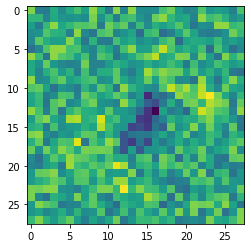

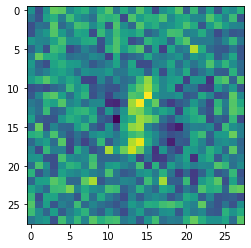

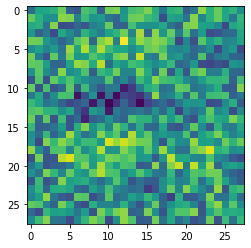

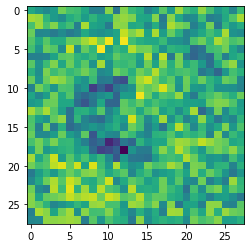

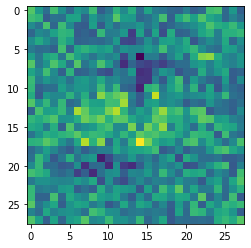

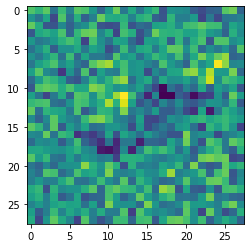

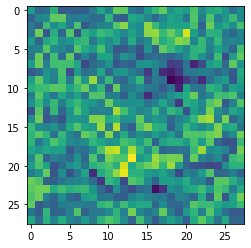

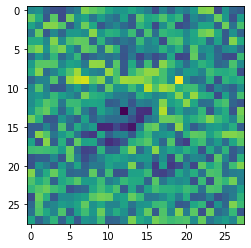

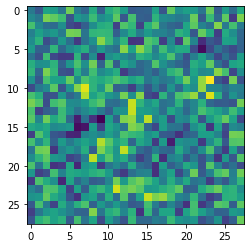

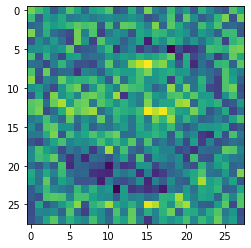

In [80]:
#--------------------------| Question 6 |--------------------------------------
#Neural networks learn the weights. Learning neural networks means adjusting weights of nodes
#in the network to match the corresponding values of outputs. In the network we created in 
#previous example, there are 784 weights associated with each output node. i.e. 784 weights
#for 10 output nodes making 7840 total weights.

weights = model.layers[0].get_weights()[0]

for i in range(10):
    array = weights[:,i]
    plt.imshow(array.reshape((28,28)))
    plt.show(block=True)

#The shapes are interesting indeed. They try to resemble the shape of digits. The weights in
# the first layer resembles mote to the shape of "0", second resembles more to the shape of 
# "1" and so on till "9".
